In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\excel.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-13:])





models = []

# loop through the number of columns to keep
for i in range(12, 0, -1):
    columns_to_keep = ['datum']
    # keep the first i 'repo' columns
    for j in range(i):
        columns_to_keep.append(f'repo-{j}')
    # keep the first i 'aktivni' columns
    for j in range(i):
        columns_to_keep.append(f'aktivni-{j}')
    # keep the first i 'cena' columns
    for j in range(i):
        columns_to_keep.append(f'cena-{j+1}')
    # keep the first i 'zobrazeni' columns
    for j in range(i):
        columns_to_keep.append(f'zobrazeni-{j+1}')
    # keep the first i 'doba' columns
    for j in range(i):
        columns_to_keep.append(f'doba-{j+1}')
    
    features_to_keep = columns_to_keep
    X = df[features_to_keep]
    Y = df[['aktivni-0']]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    categorical_features = []
    numerical_features = []
    for i, column in enumerate(X_train.columns):
        if X_train[column].dtype == object:
            categorical_features.append(i)
        else:
            numerical_features.append(i)

    preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])


    X_train.columns = X.columns
    X_test.columns = X.columns

    # Train the model on the train set
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    models.append(linreg)


preprocessor.fit(X_train)

# Evaluate the models
for i, model in enumerate(models):
    X_test = preprocessor.transform(X_test)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model {i+1}:")
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")



C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but LinearRegression is expecting 61 features as input.

uložit model

In [118]:
#ulozit model
import pickle
nejlepsi_rmse = 321

filename = 'finalized_model_7_months.sav'
pickle.dump(model, open(filename, 'wb'))

předpověď

             0   datum
0  7974.811276  202302
1  8236.563809  202303
2  7992.471968  202304
3  7848.717521  202305
4  7978.257336  202306
5  7777.337901  202307
6  8187.731030  202308


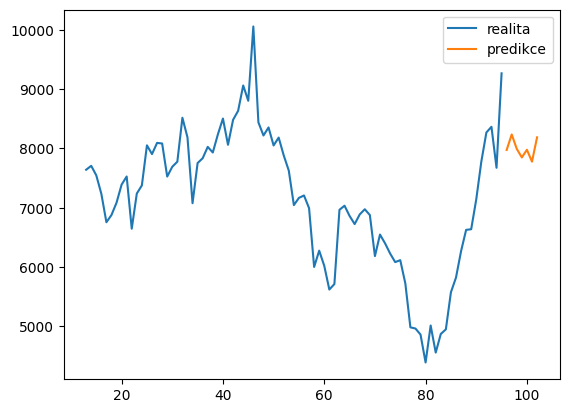

In [119]:
import pickle
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\excel.xlsx")
df = df.drop(df.index[:-7])
# nacist nejlepsi model
filename = 'finalized_model_7_months.sav'
loaded_model = pickle.load(open(filename, 'rb'))
x_new = df[['datum', 'repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7',
        'aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7', 
        'cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7',
        'zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7',
        'doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']]

# Predikce na novych datech
y_new_pred = loaded_model.predict(x_new)

# vytiskonut vysledky
new_df = pd.DataFrame(y_new_pred)
x_new_short = x_new.tail(7)
x_new_reset = x_new_short.reset_index()
new_df = pd.concat([new_df, x_new_reset.iloc[:,1]], axis=1)
print(new_df)


#graf
plt.plot(X.index.values,Y, label='realita')
plt.plot(x_new.index, y_new_pred, label='predikce')
plt.legend()
plt.show()